<a href="https://colab.research.google.com/github/Abdul-Lahad/PyTorch-Tutorial/blob/main/Softmax_and_CrossEntropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Tutorial 11: Softmax and Cross-Entropy Loss

## Introduction to Softmax and Cross-Entropy Loss
- The softmax function is used to convert raw outputs (logits) into probabilities, with values squashed between 0 and 1.
- Cross-entropy loss measures the performance of a classification model by comparing predicted probabilities to actual labels. Lower divergence means better performance.
### Softmax Equation
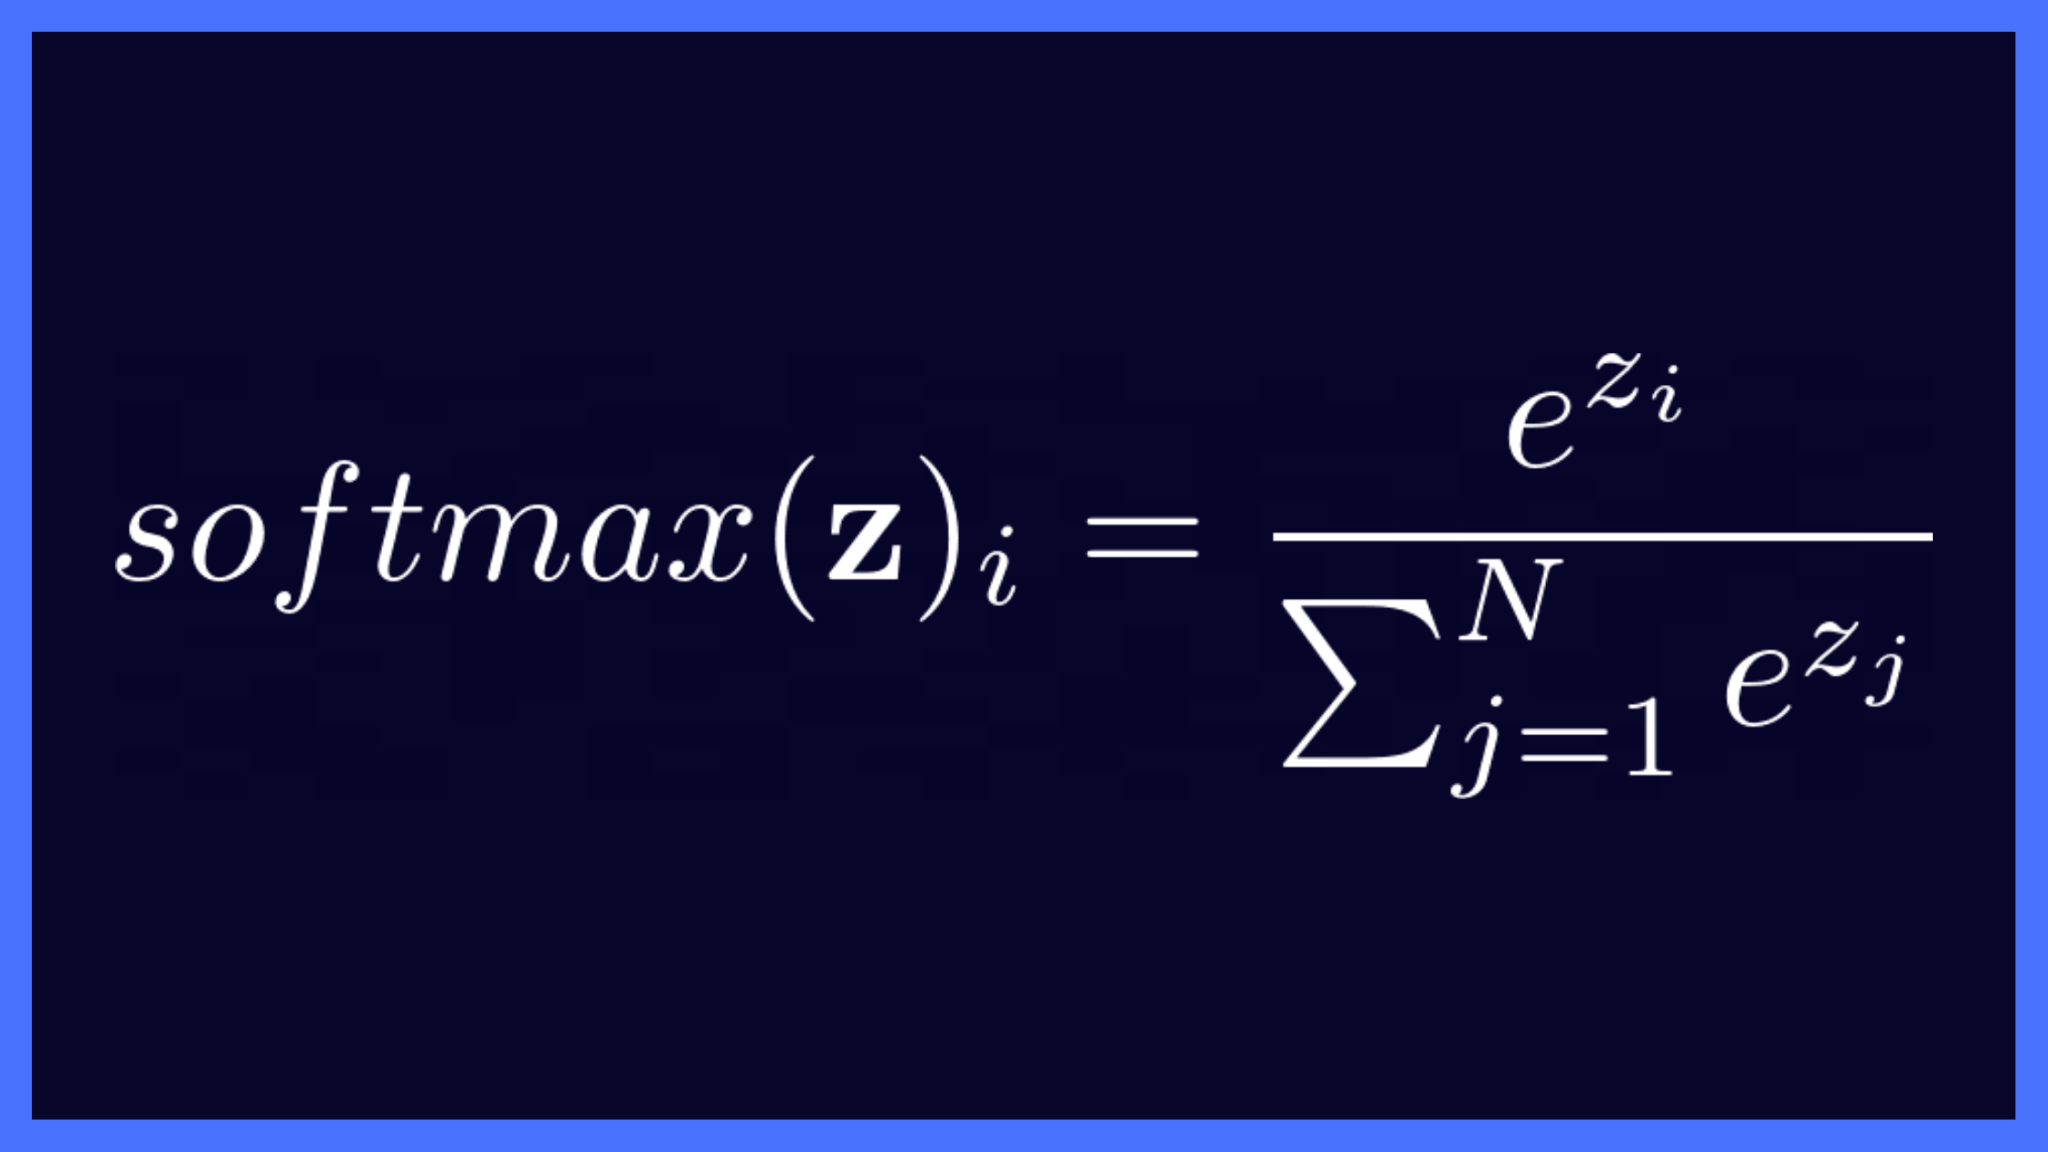

The softmax function is defined as:

\[
\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^N e^{z_j}}
\]

Where:
- \( z \) is the input vector (logits).
- \( z_i \) is the \( i \)-th element of the input vector.
- \( N \) is the total number of elements in \( z \).

This function converts the input values into probabilities, where:
1. Each probability lies between 0 and 1.
2. The sum of all probabilities equals 1.


## Softmax Implementation
- **In NumPy**:
  - The softmax function can be implemented in a single line using the exponential function and normalization.
- **In PyTorch**:
  - Use `torch.softmax` to compute softmax along a specified dimension (`dim=0` for example).

In [3]:
import torch
import numpy as np
import torch.nn as nn

In [4]:
#numpy implimentation
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=0)


x = np.array([1.0, 2.0, 3.0])
outputs = softmax(x)
print(outputs)

[0.09003057 0.24472847 0.66524096]


In [5]:
#Pytorch Implementation
x = torch.tensor([1.0, 2.0, 3.0])
outputs = torch.softmax(x, dim=0) # function takes tensor and Dimension
print(outputs)

tensor([0.0900, 0.2447, 0.6652])


## Understanding Cross-Entropy Loss
- Cross-Entropy measures the performance of a classification model whose output is a probability distribution.
- A **lower loss** indicates better performance, with the loss increasing as predictions deviate from the actual labels.
- Example of good and bad predictions:
    - **Good Prediction**: Low loss.
    - **Bad Prediction**: High loss.
- **PyTorch’s Cross-Entropy Loss** combines the softmax and negative log-likelihood loss.
- Actual labels should not be one-hot encoded, and predictions must be raw scores (logits).
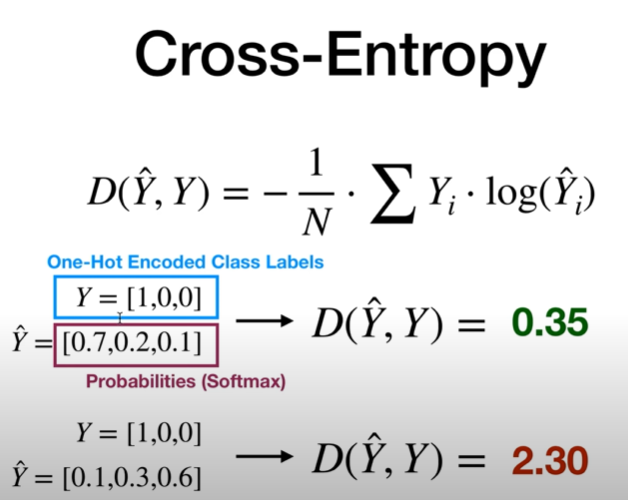

## Binary Classification with BCE Loss
- For binary classification:
    - Use a **sigmoid activation function** at the output layer.
    - Use **Binary Cross-Entropy Loss (BCE)** for training:
        ```python
        loss_fn = torch.nn.BCELoss()
        y_true = torch.tensor([1.0])  # Label
        y_pred = torch.tensor([0.8])  # Sigmoid output
        loss = loss_fn(y_pred, y_true)
        print(loss.item())
        ```

- Adjust the neural network structure:
    - Output size: 1 (instead of one per class).
    - Activation: **Sigmoid** instead of softmax.

In [6]:
#Cross Entropy loss function in numpy
def cross_entropy(actual, predicted):
    loss =-np.sum(actual * np.log(predicted))
    return loss/float(predicted.shape[0])


In [7]:
Y = np.array([1,0,0])

Y_pred_good = np.array([0.7,0.2,0.1])
Y_pred_bad = np.array([0.1,0.3,0.6])

l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y,Y_pred_bad)

print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

Loss1 numpy: 0.1189
Loss2 numpy: 0.7675


In [10]:
#Implementing the Cross Entropy Loss function through Pytorch
loss = nn.CrossEntropyLoss()

y = torch.tensor([2,0,1]) # Three rows Target Variables of the data

y_pred_good = torch.tensor([[0.1,0.2,0.7],[0.7,0.2,0.1],[0.2,0.7,0.1]])
y_pred_bad = torch.tensor([[0.6,0.3,0.1],[0.1,0.3,0.6],[0.1,0.3,0.6]])

print(loss(y_pred_good,y))
print(loss(y_pred_bad,y))


tensor(0.7679)
tensor(1.2866)


In [11]:
Loss = nn.BCELoss(); # This is loss function is used for the binary classification Models